In [1]:
# !git clone https://github.com/vincentnam/ProjetInterpromo2020G8.git

# What is this notebook : 

This Notebook is an exemple of usage of layout processing pipeline to extract seat and elements as toilets or galley in a plane layout.
The software architecture is describe in detail in the github (https://github.com/vincentnam/ProjetInterpromo2020G8.git) repository in a UML class diagram.

The solution proposed process for an image several processes. In order, it run :
    - preprocesses (to prepare images for processes)
    - processes 
    - post processes (to correct the predictions made by processes)


2 technics are implemented in this version : 
    - Pattern matching (with OpenCV) for seat detection
    - Image segmentation (with Sciki-Image) for element detection


## Environnement 

Python >= 3.6 :  
    - gensim==3.8.1
    - matplotlib==3.1.2
    - Pillow==7.0.0
    - pandas==0.25.3
    - numpy==1.18.0
    - opencv-python==4.1.2.30
    - opencv-contrib-python==4.1.2.30
    - scikit-image==0.16.2
    - scikit-learn==0.22.1

The notebook is an exemple of using but this solution can be exported as a library in other project. All the code is in the "layout_processing" module folder.


## Data : 

The project is based on data that have been given in the archive that come with this project. We kept the same architecture.
Data used in this project are :
    - Layout SeatGuru
    - SEAT_GURU_AIRCRAFT.csv
    - Images.csv (CSV created during the project with informations on elements to detect in layouts
We asssume that this solution works on .jpg files. It has to be a little fine tuned to works properly on other type of images and SeatMaestro layouts.
To works on SeatMaestro, it has to be fine tuned to match on the graphical chart used for theses layouts.

## Function :

To use this solution, processes has to be defined. 
To define a new process, follow theses steps : 
    - Define a class inheriting from the process you want
    - Implement "process_desc" and the "run" method (It has to be implemented following the software description)
    - Instantiate a pipeline
    - Add the process in the pipeline via "add_processes"
    - Run "run_pipeline" 
    - Get the result via the "json" parameter of the pipeline to get results of processes.

Look at "SeatFinder", "RemoveDoubleSeat" and "BlackWhite" implementations to have an exemple.

In [21]:
from layout_processing.blackwhite import BlackWhite
from layout_processing.colourpipelinezone import ColourPipelineZones
from layout_processing.pipeline import Pipeline
from layout_processing.removedoubleseat import RemoveDoubleSeat
from layout_processing.seatfinder import SeatFinder
from layout_processing.segmentationzone import SegmentationZone

In [22]:
base_data_path = "/data/dataset/projetinterpromo/Interpromo2020/"

# Pipeline Seat

In [4]:
pipeline_seat = Pipeline(base_data_path,["Aer_Lingus_Airbus_A330-300_A_plane6.jpg"])
pipeline_seat.add_processes([BlackWhite, SeatFinder, RemoveDoubleSeat])

OpenCV4.1.2.30 -> rgb to grey a été ajouté.
OpenCV4.1.2.30 -> Pattern Matching seat a été ajouté.
Standard Python >= 3.5 -> remove double point in list a été ajouté.


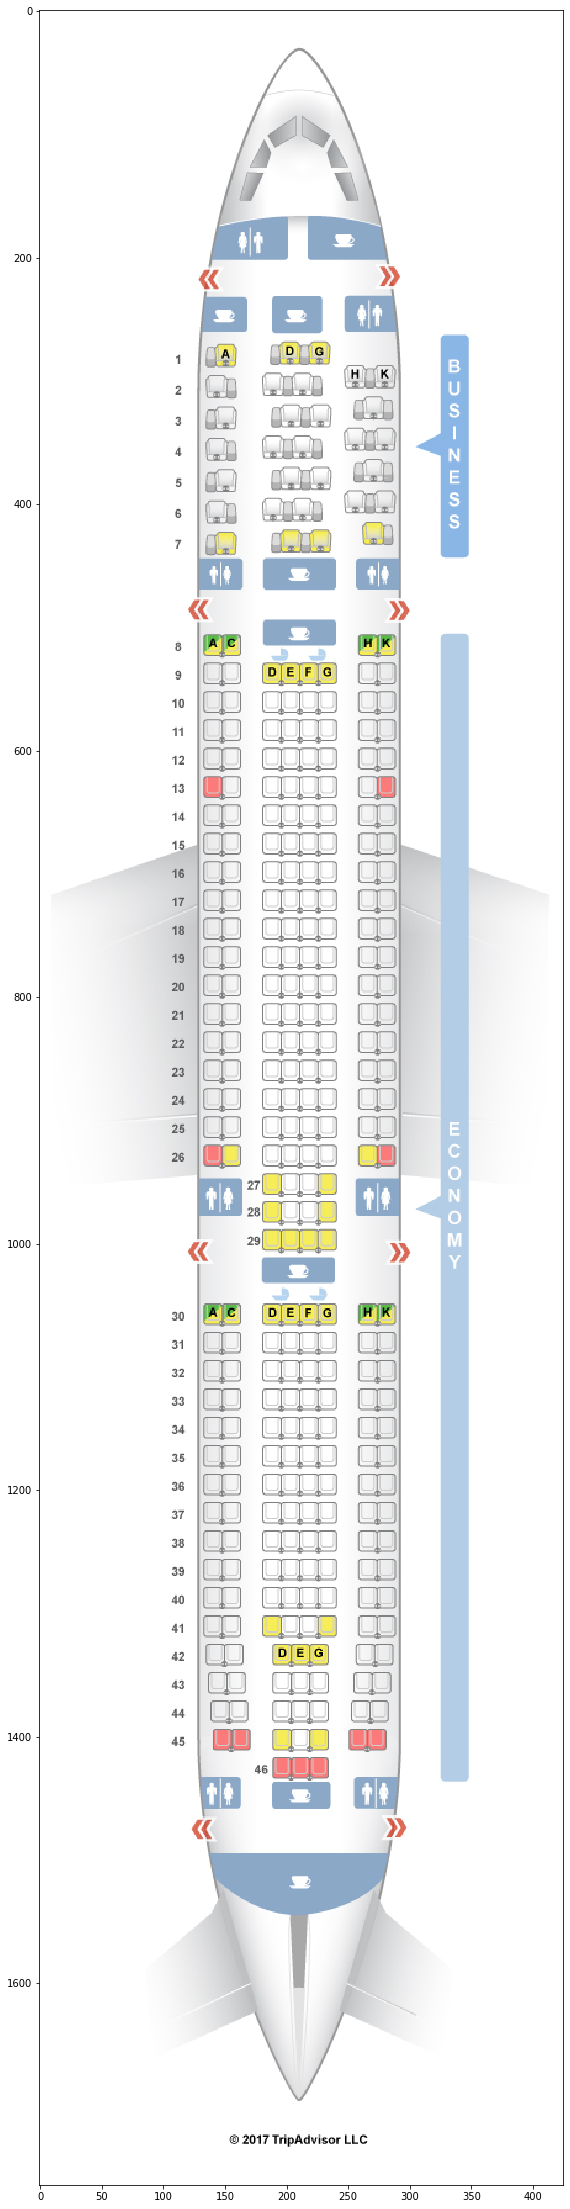

Pipeline start : 
Preprocess :  OpenCV4.1.2.30 -> rgb to grey
Doing : OpenCV4.1.2.30 -> rgb to grey


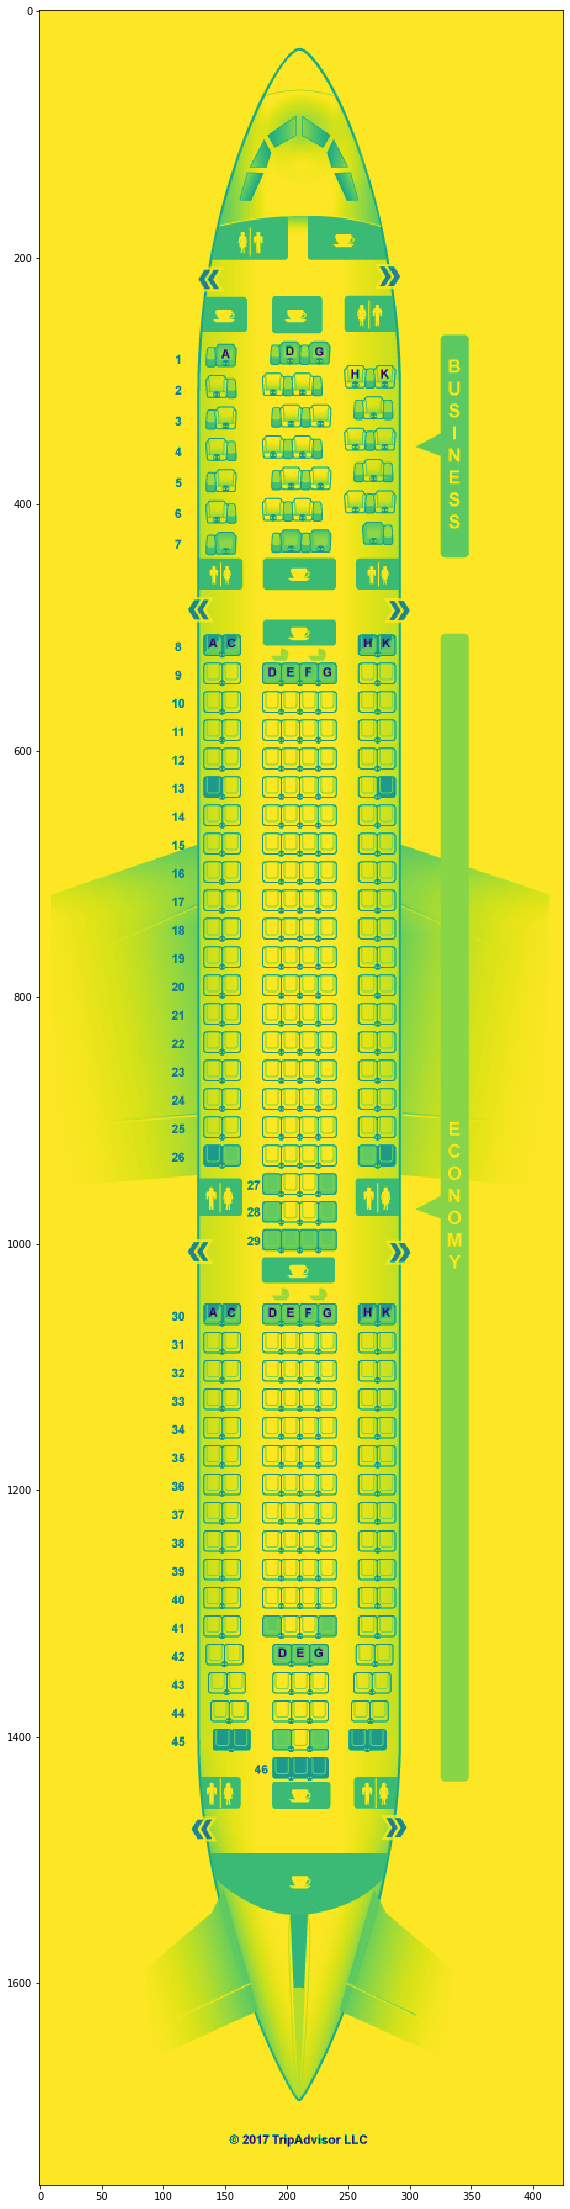

Process :  OpenCV4.1.2.30 -> Pattern Matching seat
Doing : OpenCV4.1.2.30 -> Pattern Matching seat
Postprocess :  Standard Python >= 3.5 -> remove double point in list
Doing : Standard Python >= 3.5 -> remove double point in list


In [23]:
pipeline_seat.run_pipeline(1, verbose = 1)

# Pipeline Zone

Standard Python >= 3.5 -> preprocess colours a été ajouté.
OpenCV4.1.2.30 -> rgb to grey a été ajouté.
OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas a été ajouté.


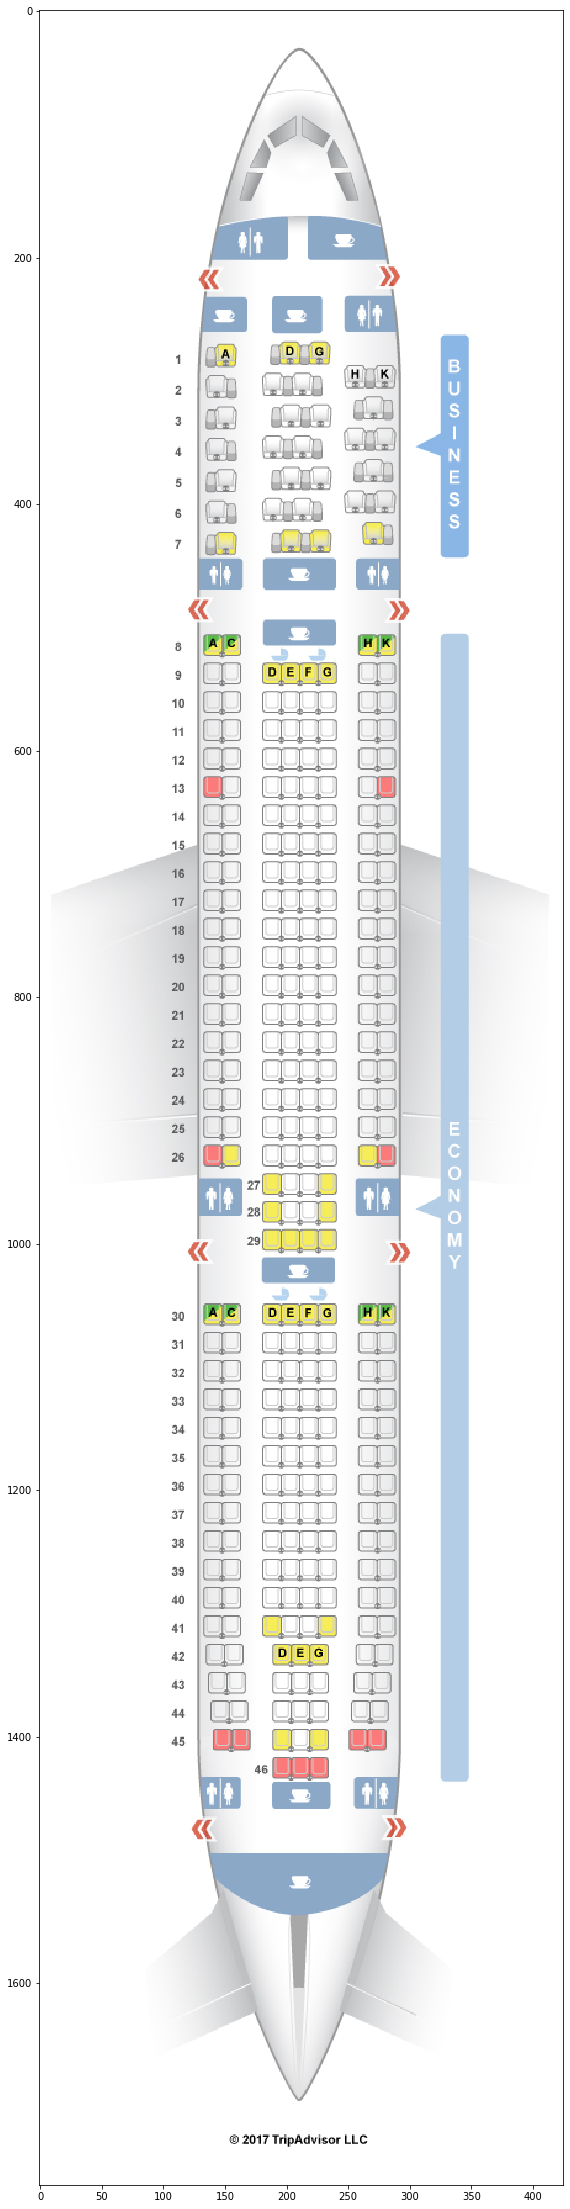

Pipeline start : 
Preprocess :  Standard Python >= 3.5 -> preprocess colours
Doing : Standard Python >= 3.5 -> preprocess colours


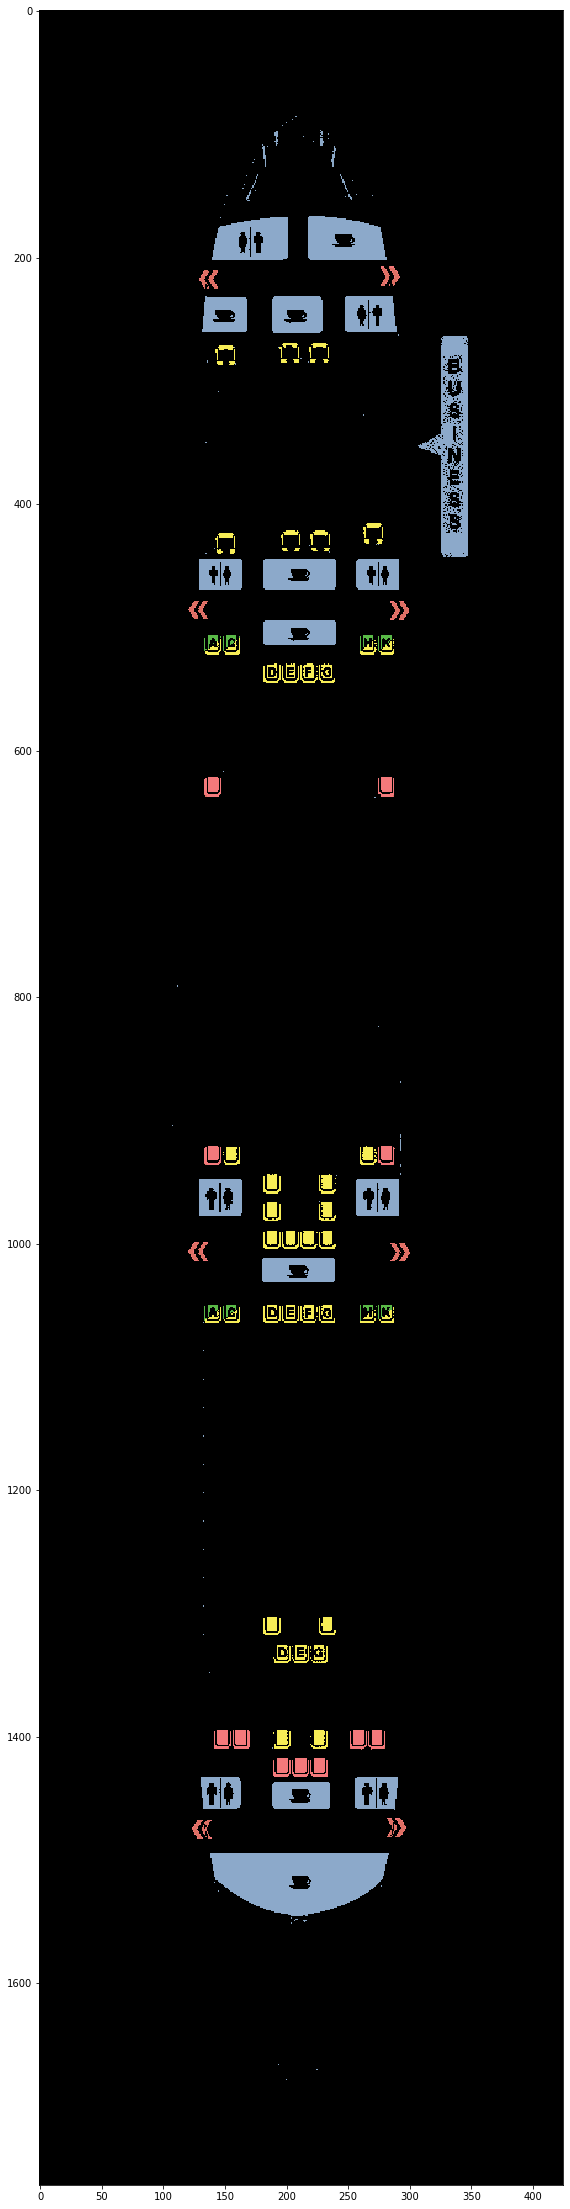

Preprocess :  OpenCV4.1.2.30 -> rgb to grey
Doing : OpenCV4.1.2.30 -> rgb to grey


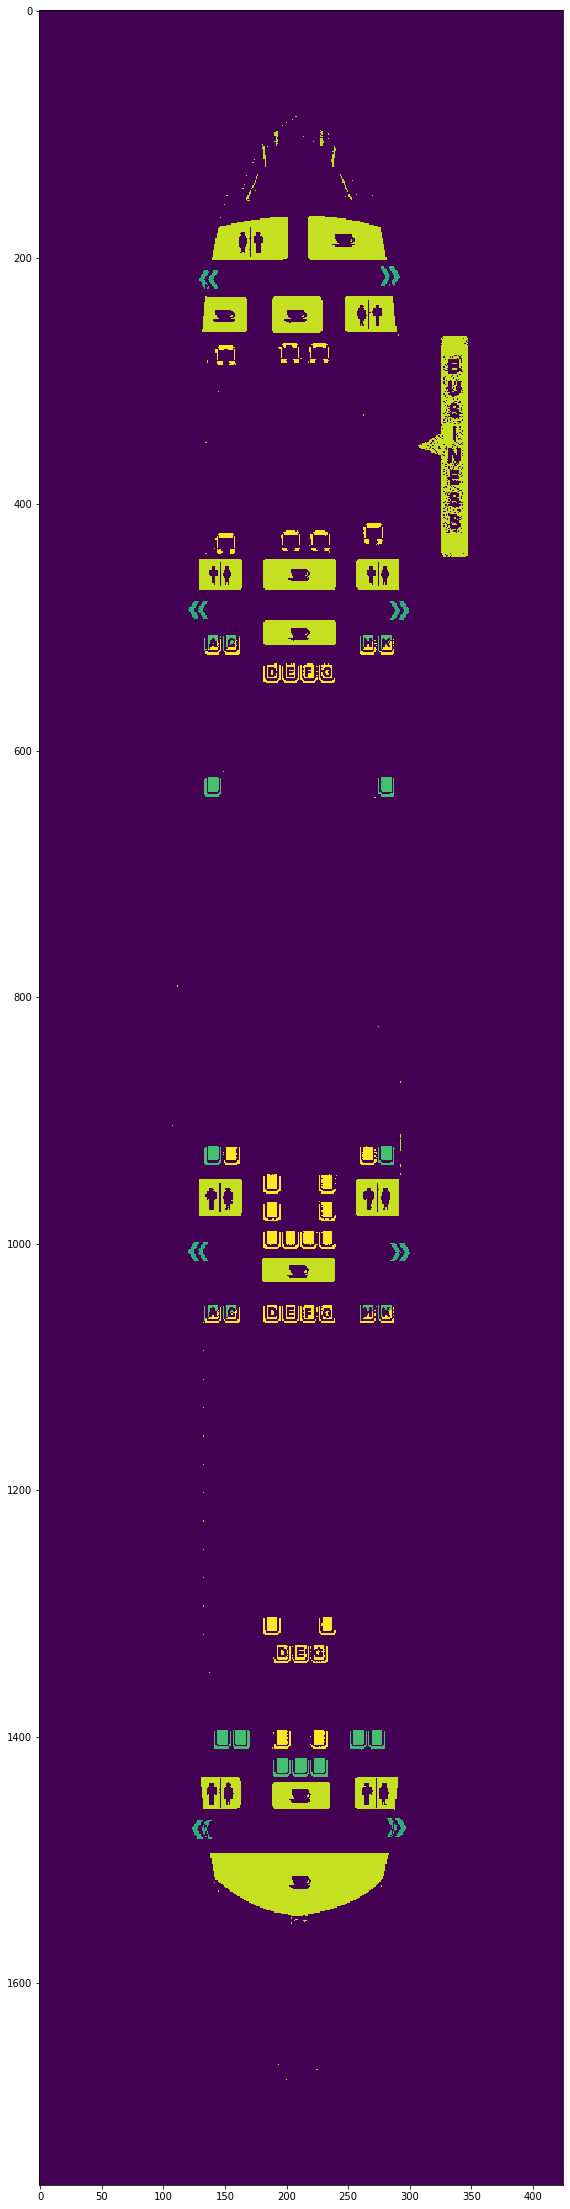

Process :  OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas
Doing : OpenCV4.1.2.30 / Scikit-image 0.16-> segmentation over colour areas


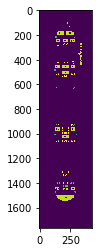

['bar4.png', 'bar5.png', 'sortie_droit.png', 'sortie_droit3.png', 'sortie_droit4.png', 'sortie_droit6.png', 'sortie_droit7.png', 'sortie_droit8.png', 'sortie_droit9.png', 'sortie_gauche.png', 'sortie_gauche2.png', 'sortie_gauche3.png', 'sortie_gauche4.png', 'toilettes.png', 'toilettes2.png', 'toilettes3.png', 'toilettes4.png', 'toilettes5.png', 'toilettes6.png', 'toilettes7.png']


In [6]:
pipeline_zone = Pipeline(base_data_path,["Aer_Lingus_Airbus_A330-300_A_plane6.jpg"])
pipeline_zone.add_processes([ColourPipelineZones, BlackWhite, SegmentationZone])
pipeline_zone.run_pipeline(1)

In [24]:
import cv2 as cv 
import matplotlib.pyplot as plt 



def to_rgb(image):
        return cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
def draw_contour(image, name_img, pipeline_zone, pipeline_seat, type = 2):
    
    image = to_rgb(image) # change color postion BGR to RGB
    
    # 
    dict_colour_seat = {'BUSINESS': (255, 0, 0),
                     'ECONOMY': (255, 0, 255),
                     'FIRST': (0, 255, 0),
                     'PREMIUM': (255, 255, 0)}
    
    # for each rectangles it will draw it on the image
    if type ==2 or type== 1 : 
        for zone in pipeline_zone[name_img]:
            for rect in pipeline_zone[name_img][zone]:
                y, x = rect[0], rect[1]
                w, h = abs(x-rect[3]), abs(y-rect[2])
                image = cv.rectangle(image, (x,y), (x+w, y+h),(0,0,255), 2)
    if type == 2 or type == 0 : 
        for category in pipeline_seat[name_img]:
            for seat in pipeline_seat[name_img][category]:
                x , y = seat[0], seat[1]
                h, w = seat[2], seat[3]
                image = cv.rectangle(image, (x,y), (x+w, y+h),dict_colour_seat[category], 2)
     
    plt.figure(figsize=(10,20))
    plt.imshow(image)


# Results of elements detection via colours processing : 

As we can find a straight difference between elements we want to extract and the rest of the layout's elements, we can work on colors to make it easy to do semgentation over image. 
When it's done, a pattern matching is done to identify each zone.

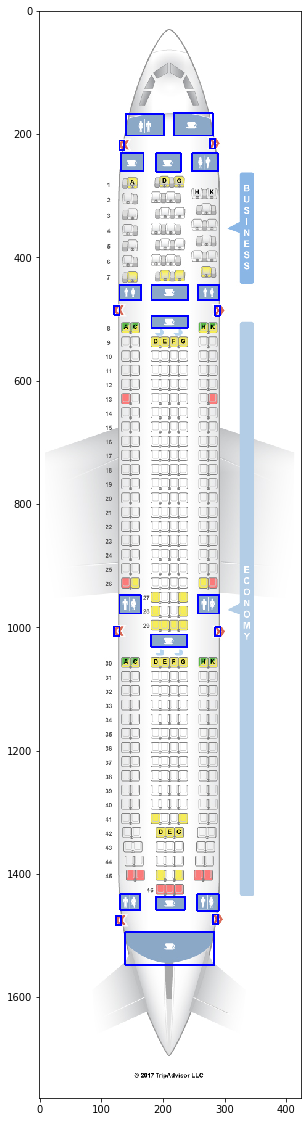

In [26]:

image = cv.imread(base_data_path + '/All Data'+
                 '/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-300_A_plane6.jpg')

draw_contour(image,"Aer_Lingus_Airbus_A330-300_A_plane6.jpg", pipeline_zone.json, pipeline_seat.json, type= 1)

# Result of seat extraction
The seat etraction is done with pattern matching with OpenCV. A list of pattern have been extracted. Each pattern is searched in the image and new pattern are extracted to upgrade detection.

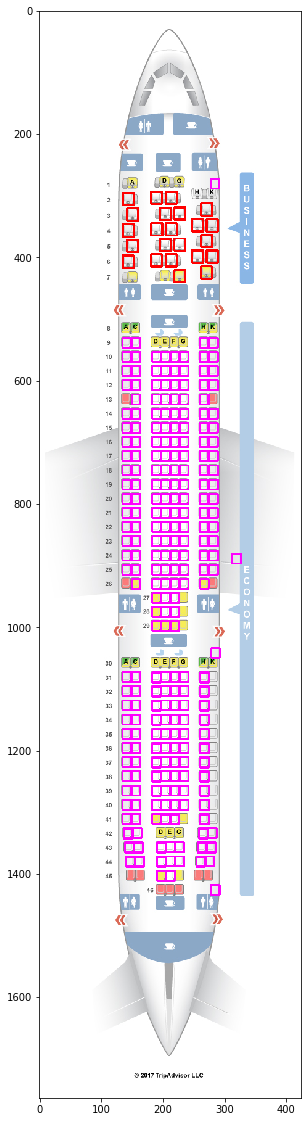

In [19]:
draw_contour(image,"Aer_Lingus_Airbus_A330-300_A_plane6.jpg", pipeline_zone.json, pipeline_seat.json, type= 0)

# Merging of results

Results are merged and we can draw each elements that have been extracted on the same image.

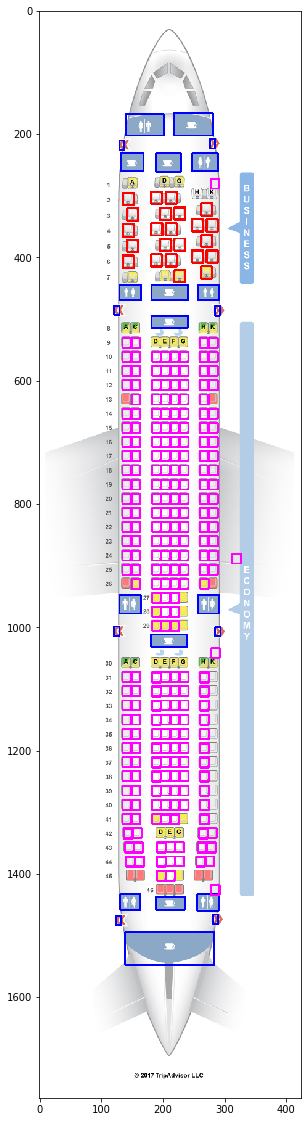

In [20]:
draw_contour(image,"Aer_Lingus_Airbus_A330-300_A_plane6.jpg", pipeline_zone.json, pipeline_seat.json, type= 2)

## Pipeline Merge

DistPipeline is a pipeline using 2 pipelines (Seat and Elements) to merge results and getting each distance of seat to each elements.

In [8]:
from layout_processing.distpipeline import DistPipeline

In [9]:
dist_pipeline = DistPipeline(pipeline_seat, pipeline_zone)

In [10]:
json_dist = dist_pipeline.to_json_simple_distance(dist_pipeline.pipeline.json, dist_pipeline.pipeline_zone.json)

#print(json_dist)